# Data Science  Tools Project

## Data Seience Tools Project

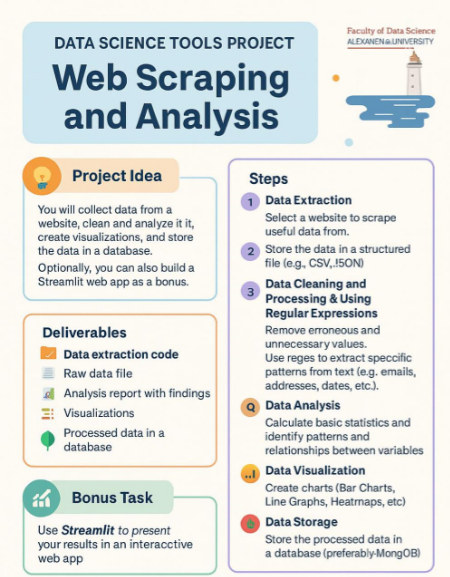 
#### Consists of :
##### 1.Data Extraction (Web Scraping)
##### 2.Store the data in a file
##### 3.Data Cleaning 
##### 4.Data PreProcessing 
##### 5.Regular Expressions
##### 6.Data Analysis
##### 7.Data Visualization
##### 8.Data Storage
##### BOUNS: Streamlit(to represent the results in interactive WebPage)


#### 1.First Data Extraction(WebScraping)

##### pip install beautifulsoup4  -> on the terminal

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from tqdm import tqdm
import json

## we will make the scraping on: JUMIA

this is the code of web scraping
# Configure session with headers to mimic browser behavior
session = requests.Session()
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.jumia.com.eg/',
    'DNT': '1'
}
session.headers.update(headers)

# List of categories to scrape for comprehensive data collection
categories = [
    "smartphones",
    "laptops",
    "televisions",
    "home-audio",
    "headphones",
    "kitchen-appliances",
    "men-watches",
    "women-watches",
    "fragrances",
    "mobile-accessories",
    "computing-accessories",
    "gaming",
    "cameras",
    "printers-scanners"
]

# Number of pages to scrape per category (Jumia shows max 50 pages)
PAGES_PER_CATEGORY = 50

# Minimum delay between requests (in seconds)
MIN_DELAY = 1
MAX_DELAY = 3

def scrape_product_card(product):
    """Extract data from a single product card"""
    data = {}
    
    # Product name
    name_elem = product.find('h3', class_='name')
    data['name'] = name_elem.text.strip() if name_elem else None
    
    # Current price
    price_elem = product.find('div', class_='prc')
    data['price'] = price_elem.text.strip() if price_elem else None
    
    # Original price (if discounted)
    old_price_elem = product.find('div', class_='old')
    data['original_price'] = old_price_elem.text.strip() if old_price_elem else None
    
    # Discount percentage
    discount_elem = product.find('div', class_='bdg _dsct _sm')
    data['discount'] = discount_elem.text.strip() if discount_elem else None
    
    # Rating
    rating_elem = product.find('div', class_='stars _s')
    data['rating'] = rating_elem.text.strip() if rating_elem else None
    
    # Review count
    reviews_elem = product.find('div', class_='rev')
    data['review_count'] = reviews_elem.text.strip() if reviews_elem else None
    
    # Brand (extracted from name)
    data['brand'] = data['name'].split()[0] if data['name'] else None
    
    # Seller information
    seller_elem = product.find('div', class_='bdg _mall _sm')
    data['seller'] = seller_elem.text.strip() if seller_elem else None
    
    # Shipping information
    shipping_elem = product.find('div', class_='bdg _sv _sm')
    data['shipping'] = shipping_elem.text.strip() if shipping_elem else None
    
    # Product URL
    link_elem = product.find('a', href=True)
    data['url'] = 'https://www.jumia.com.eg' + link_elem['href'] if link_elem else None
    
    return data

def scrape_jumia_page(url):
    """Scrape a single page of Jumia products"""
    try:
        response = session.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        products = soup.find_all('article', class_='prd _fb col c-prd')
        if not products:
            print(f"No products found at {url}")
            return None
        
        page_data = []
        for product in products:
            product_data = scrape_product_card(product)
            page_data.append(product_data)
        
        return page_data
    
    except requests.exceptions.RequestException as e:
        print(f"Error scraping {url}: {e}")
        return None

def scrape_jumia_category(category, max_pages):
    """Scrape an entire category from Jumia"""
    all_products = []
    
    for page in tqdm(range(1, max_pages + 1), desc=f"Scraping {category}"):
        url = f"https://www.jumia.com.eg/{category}/?page={page}"
        page_data = scrape_jumia_page(url)
        
        if page_data:
            all_products.extend(page_data)
        
        # Random delay to avoid being blocked
        time.sleep(random.uniform(MIN_DELAY, MAX_DELAY))
    
    return all_products

def save_data(data, filename):
    """Save scraped data to JSON file"""
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

def main():
    """Main scraping function"""
    all_data = {}
    
    for category in categories:
        category_data = scrape_jumia_category(category, PAGES_PER_CATEGORY)
        all_data[category] = category_data
        
        # Save data after each category as a precaution
        save_data(all_data, 'jumia_data_partial.json')
        print(f"Saved {len(category_data)} products from {category}")
    
    # Final save
    save_data(all_data, 'jumia_data_full.json')
    print(f"\nScraping complete. Total categories: {len(all_data)}")
    
    # Also save as CSV for easier analysis later
    flat_data = []
    for category, products in all_data.items():
        for product in products:
            product['category'] = category
            flat_data.append(product)
    
    df = pd.DataFrame(flat_data)
    df.to_csv('jumia_data.csv', index=False, encoding='utf-8')
    print("Data also saved as CSV (jumia_data.csv)")

#if _name_ == "_main_":
main()

In [ ]:
df=pd.read_csv('jumia_data.csv')
df

,name,price,original_price,discount,rating,review_count,brand,seller,shipping,url,category
0,Samsung A06 - 6.7 Inch 128GB/4GB Dual SIM 4G M...,"EGP 5,499.00","EGP 7,148.70",23%,4.1 out of 5,4.1 out of 5(16),Samsung,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,smartphones
1,"Samsung Galaxy A16 - 6.7"" 128GB/6GB Dual SIM 4...","EGP 7,850.00","EGP 9,420.00",17%,4 out of 5,4 out of 5(33),Samsung,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,smartphones
2,"Samsung Galaxy A16 - 6.7"" 256GB/8GB Dual SIM 4...","EGP 9,250.00","EGP 11,100.00",17%,4.4 out of 5,4.4 out of 5(18),Samsung,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,smartphones
3,Samsung A06 - 6.7 Inch 128GB/6GB Dual SIM 4G M...,"EGP 6,199.00","EGP 8,058.70",23%,3.9 out of 5,3.9 out of 5(22),Samsung,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,smartphones
4,"Samsung Galaxy A16 - 6.7"" 128GB/4GB Dual SIM 4...","EGP 7,199.00","EGP 9,358.70",23%,4.6 out of 5,4.6 out of 5(9),Samsung,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,smartphones
...,...,...,...,...,...,...,...,...,...,...,...
8871,Fujifilm Lens GF45mmF2.8 R WR,"EGP 84,999.00",NaN,NaN,NaN,NaN,Fujifilm,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,cameras
8872,NANLITE BD-PT15CII+EC Grid For Pavotube 15C,"EGP 2,999.00","EGP 3,999.00",25%,NaN,NaN,NANLITE,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,cameras
8873,Godox MF-CB Round Adapter For MF12,EGP 299.00,"EGP 1,099.00",73%,NaN,NaN,Godox,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,cameras
8874,Godox FLS10 - Fresnel Lens,"EGP 4,999.00","EGP 5,999.00",17%,NaN,NaN,Godox,NaN,NaN,https://www.jumia.com.eg/customer/account/logi...,cameras
